# Logistic Regression

In [18]:
#!pip install mlxtend

In [1]:
# Render our plots inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Make the graphs a bit bigger
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])

In [3]:
dataset = pd.read_csv('https://raw.githubusercontent.com/ahmadajal/DM_ML_course_public/master/5.%20Classification/in-classExercise/data/IRIS.csv')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# how many of every species?
dataset.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [5]:
# keep only 2 classes
df = dataset[dataset.species != 'Iris-virginica']
df=df.drop(['sepal_length' ,'petal_length'], axis=1)
df.head()

,sepal_width,petal_width,species
0,3.5,0.2,Iris-setosa
1,3.0,0.2,Iris-setosa
2,3.2,0.2,Iris-setosa
3,3.1,0.2,Iris-setosa
4,3.6,0.2,Iris-setosa


In [7]:
# how many of every species?
df.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Name: species, dtype: int64

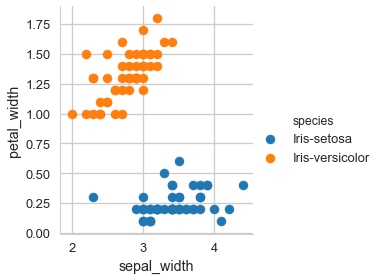

In [61]:
sns.FacetGrid(df, hue="species", height=4) \
   .map(plt.scatter, "sepal_width", "petal_width") \
   .add_legend();

### Let's train our first logistic regression model ####

### Train Test split

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(df.drop('species', axis=1), df['species'])

### Training and Predicting

In [9]:
model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [10]:
print(model.coef_)
print(model.intercept_)

# w[1] * y + w[0] * x + b = 0
# so
#y = -(w[0]*x + b) / w[1]
def x2(x1, b, w0, w1):
    return  -(x1*w0 + b)/w1


[[-1.82518311  3.33681951]]
[2.99608802]


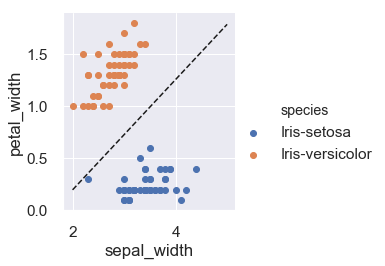

In [121]:
sns.FacetGrid(df, hue="species", height=4) \
    .map(plt.scatter, "sepal_width", "petal_width") \
    .add_legend();

xx = [2, 5]
yy = [x2(2, 2.9216922,-1.79572919,3.39122894 ), x2(5, 2.9216922,-1.79572919,3.39122894 ) ]


plt.plot(xx,yy, 'k--')

### Make a prediction

In [92]:
# let's say for point [3,0.75]
model.predict([[3,0.75]])

array(['Iris-versicolor'], dtype=object)

In [93]:
model.predict_proba([[3,0.75]])

array([[0.48052827, 0.51947173]])

### Evaluation

In [118]:
from sklearn.metrics import accuracy_score, confusion_matrix

print('Accuracy is',accuracy_score(y_pred,y_test))

Accuracy is 1.0


### Confusion Matrix

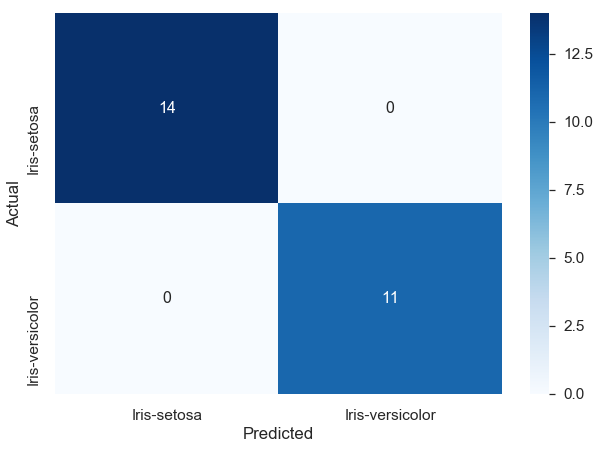

In [117]:
import numpy as np

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size